In [76]:
import numpy as np
from scipy.stats import *
import pandas as pd
import math
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('../../data/test.csv', sep=",",encoding = 'euc-kr')

In [77]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [78]:
pd_score = pd.DataFrame(data=data.to_numpy(), columns = ['kor','eng','math','grade'])
score = pd_score.convert_dtypes()

In [79]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y=score['grade']
y = encoder.fit_transform(y)
y_mapping = {index: label for index, label in enumerate(encoder.classes_)}
y
y_mapping

array([0, 1, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0,
       1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2,
       1, 1, 0, 1, 1, 2, 2, 2, 1, 2])

{0: 'A', 1: 'B', 2: 'C'}

In [64]:
score['eng'].shape
score['eng'][score['grade']=='A']

(54,)

0     81
2     81
6     81
12    81
21    81
25    81
31    81
40    81
46    81
Name: eng, dtype: Int64

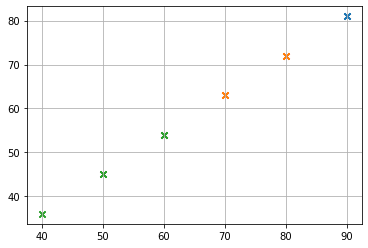

In [66]:
X_train, X_test, y_train, y_test = train_test_split(score[['kor','eng']],y, test_size=0.3, random_state=3)

#3. 시각화
# 가로축 x1, 세로 x2, 정답 라벨 y=품종
plt.scatter(score['kor'][score['grade']=='A'], score['eng'][score['grade']=='A'], marker='x') # (가로, 세로축)
plt.scatter(score['kor'][score['grade']=='B'], score['eng'][score['grade']=='B'], marker='x')
plt.scatter(score['kor'][score['grade']=='C'], score['eng'][score['grade']=='C'], marker='x')
plt.grid()
plt.show()

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scale = scaler.fit_transform(X_train)
test_scale = scaler.transform(X_test)

print(train_scale.max(),' ~', train_scale.min()) ## 0
print(test_scale.max(),' ~', test_scale.min()) ## 0

1.0  ~ 0.0
1.0  ~ 0.19999999999999996


In [68]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

std_train_scale = std_scaler.fit_transform(X_train)
std_test_scale = std_scaler.transform(X_test)

print('std_train_scale.mean:',std_train_scale.mean())
print('std_train_scale.std:',std_train_scale.std())

print('std_test_scale.mean:',std_test_scale.mean())
print('std_test_scale.std:',std_test_scale.std())

std_train_scale.mean: -1.0802169969325848e-16
std_train_scale.std: 1.0
std_test_scale.mean: 0.1891027754422937
std_test_scale.std: 0.9275693635520873


(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

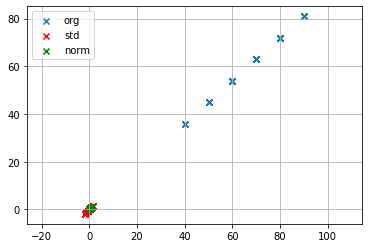

In [74]:
plt.axis('equal')
plt.scatter(score['kor'],score['eng'], marker="x", label="org")
x_norm = scaler.transform(score[['kor','eng']])
x_std = std_scaler.transform(score[['kor','eng']])
plt.scatter(x_std[:,0],x_std[:,1], c='red',marker="x", label="std")
plt.scatter(x_norm[:,0],x_norm[:,1], c='green',marker="x", label="norm")
plt.legend()
plt.grid()
plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

lr=LogisticRegression()
lr_std = LogisticRegression()
lr.fit(X_train,y_train)
print('원본데이터 점수 :',lr.score(X_train,y_train))
lr_std.fit(std_train_scale,y_train)
print('정규화 점수 :',lr_std.score(std_train_scale,y_train))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

원본데이터 점수 : 1.0


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

정규화 점수 : 1.0
